In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [2]:
dataframe = pd.read_excel('./imdb_70.xlsx')
dataframe.head(5)

title  \
0  The Shawshank Redemption   
1             The Godfather   
2    The Godfather: Part II   
3              Pulp Fiction   
4          Schindler's List   

                                            synopsis      genre  genre_id  
0  In 1947, Andy Dufresne (Tim Robbins), a banker...      Drama         0  
1  In late summer 1945, guests are gathered for t...      Crime         1  
2  The Godfather Part II presents two parallel st...      Crime         1  
3  Late one morning in the Hawthorne Grill, a res...      Crime         1  
4  The relocation of Polish Jews from surrounding...  Biography         2

In [3]:
labels = dataframe['genre_id']
texts = dataframe['synopsis']
#print(texts[0])

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
TFIDF_vectorizer = TfidfVectorizer(min_df=2, stop_words='english')

In [6]:
TFIDF_vectors = TFIDF_vectorizer.fit_transform(texts)

In [7]:
TFIDF_vectors.shape

(70, 5458)

In [8]:
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(linkage='ward', n_clusters=2)
hac.fit(TFIDF_vectors.toarray())


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [9]:
hac.labels_

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [10]:
from collections import Counter
print(Counter(hac.labels_))

Counter({0: 68, 1: 2})


In [11]:
from sklearn import metrics
predicted_labels = hac.labels_
metrics.adjusted_rand_score(labels, predicted_labels)

0.0012657920548975496

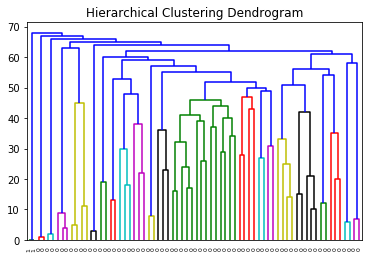

In [12]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(hac, labels=hac.labels_)
plt.show()